In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot curve of Distance vs Number of connections
def plot_threshold_curve(distance_matrix_df, method):            
    # cleaning
    distance_matrix_df = distance_matrix_df.mask(np.triu(np.ones(distance_matrix_df.shape)).astype(bool)).transpose().stack()
    distance_matrix_df.index.rename(['Obj1', 'Obj2'], inplace=True)
    distance_matrix_df = distance_matrix_df.to_frame('Dist').reset_index()

    # threshold_curve
    threshold_curve = distance_matrix_df.groupby(['Dist'])['Dist'].count()
    threshold_curve = threshold_curve.to_frame('connections').reset_index()
    threshold_curve['connections'] = threshold_curve['connections'].cumsum()
    threshold_curve.to_csv(path+percolation_folder+'/threshold_curve_'+method+'.csv')

    # plot
    plt.figure(figsize=(16,10))
    plt.scatter(threshold_curve['Dist'],threshold_curve['connections'])
    threshold=get_threshold(method)          
    plt.vlines(x=[threshold], ymin=0, ymax=500000000, colors='grey', ls='--', lw=2)
    if method == 'cosine':
        plt.xticks(list(plt.xticks()[0])[3:] + [0,threshold])
    else: 
        plt.xticks(list(plt.xticks()[0])[1:] + [threshold])
    plt.title("Threshold Curve - "+method)
    plt.xlabel("Distance")
    plt.ylabel("Num Connections")
    plt.savefig(path+percolation_folder+'/threshold_curve_'+method+'.png')
    plt.show()

    # threshold_to_cytoscape
    cytoscape_df = distance_matrix_df[(distance_matrix_df["Dist"] >= 0) & (distance_matrix_df["Dist"] <= threshold)] 
    print(str(len(pd.concat([cytoscape_df['Obj1'], cytoscape_df['Obj2']]).unique()))+ ' nodes (threshold)')
    cytoscape_df.to_csv(path+percolation_folder+'/cytoscape_'+method+str(threshold)+'.csv', index=False)


# the threshold we selected based on the curve
def get_threshold(method):
    if method == 'euclidean':
        threshold=2
    if method == 'manhattan':
        threshold=4
    if method == 'cosine':
        threshold=0.22 
    if method == 'gower':
        threshold=0.12  
    return threshold
                           

In [8]:
# path_to_data is the folder for all input and output of SynTwin, replace path_to_data to your path
# Distance_matrices subfolder was created in previous step
# create a Percolation_threshold subfolder for output in this file
path = 'path_to_data/'
distance_folder ='Distance_matrices'
percolation_folder = 'Percolation_threshold'
method_list = ['euclidean','manhattan','cosine','gower']

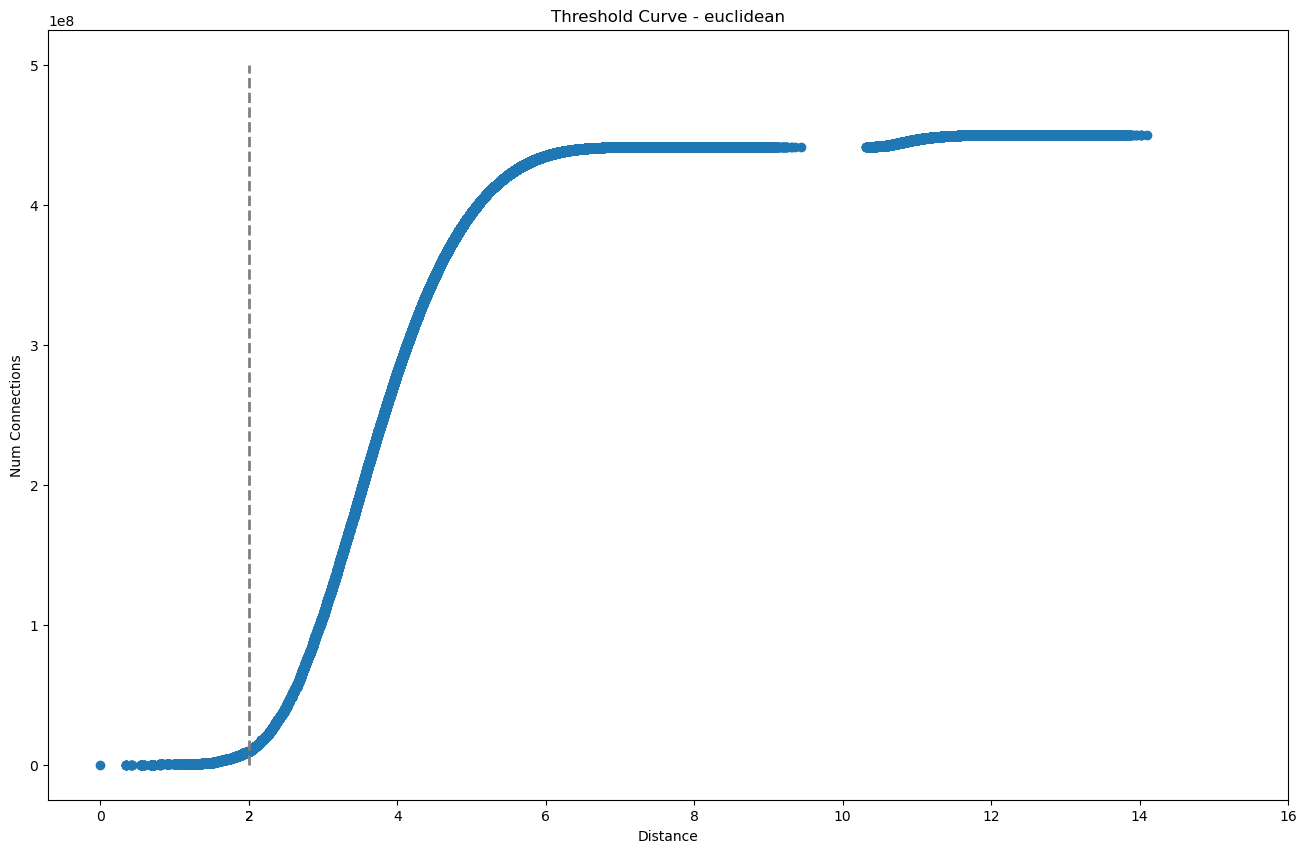

29842 nodes (threshold)


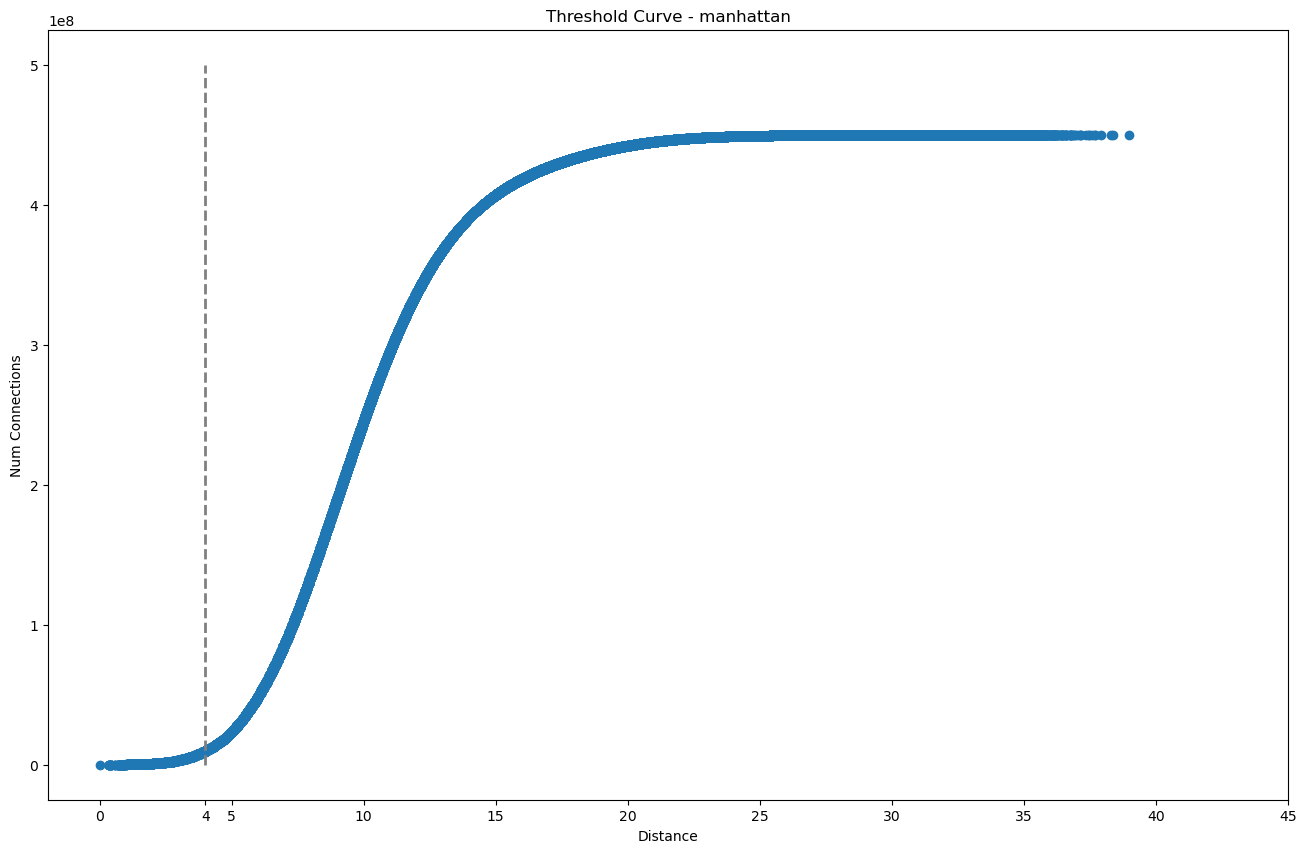

29855 nodes (threshold)


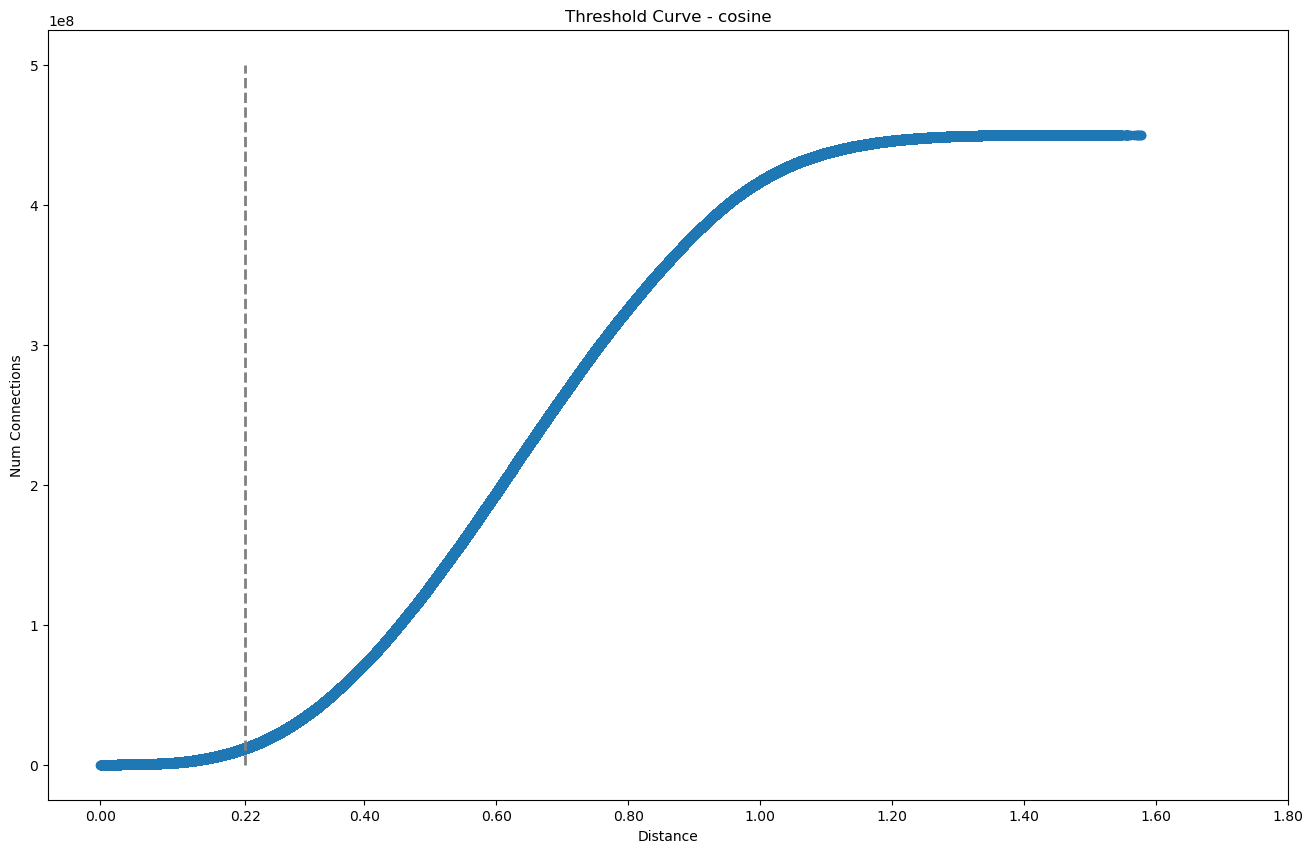

29985 nodes (threshold)


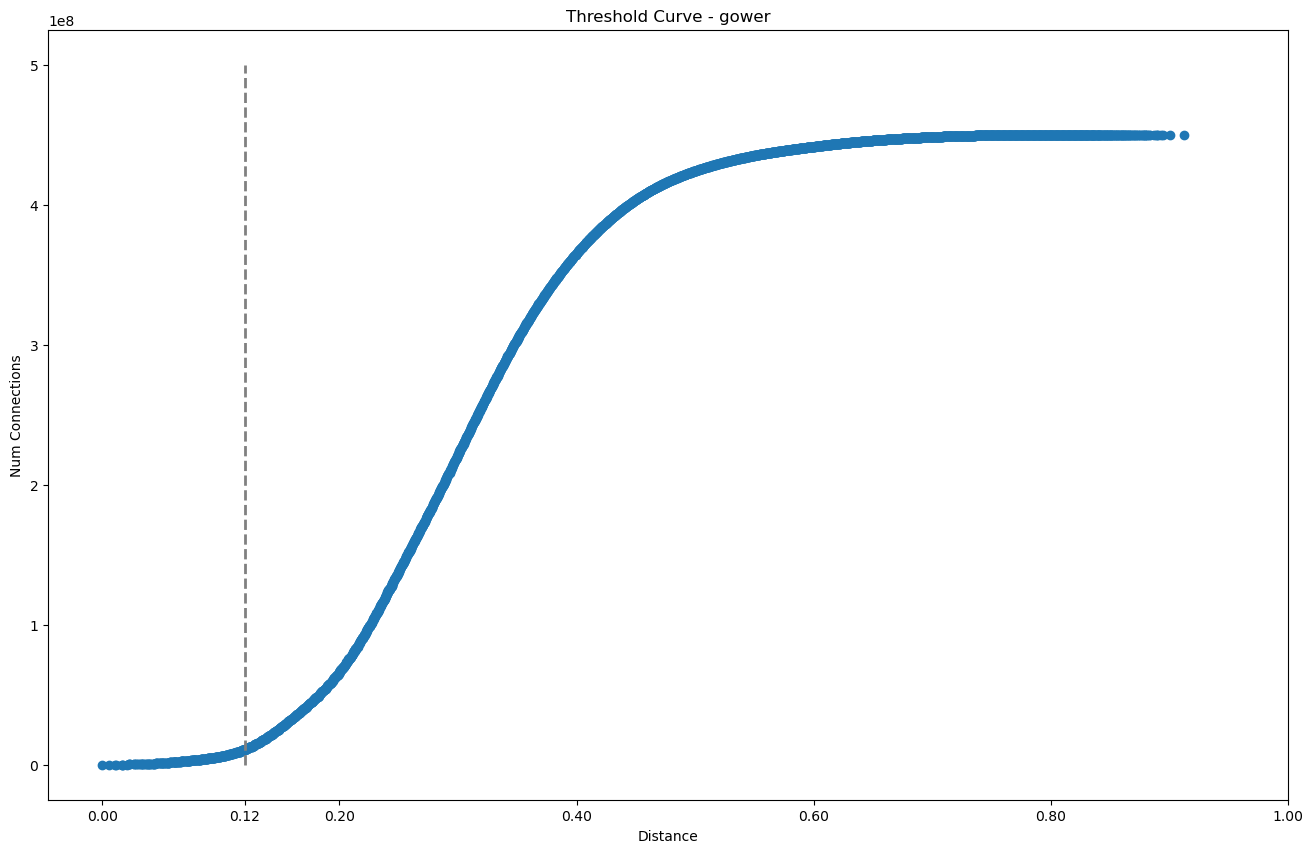

29831 nodes (threshold)


In [13]:
for method in method_list:
    input_file = path+distance_folder+'/'+ method + '_real_real.pkl'
    real_real = pd.read_pickle(input_file) 
    plot_threshold_curve(real_real, method) 